<a href="https://colab.research.google.com/github/jackiet0rres/showcase/blob/main/CUS_615_Project_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Wine Quality Dataset- Jacqueline Torres

Have to first load the data from Kaggle, referenced: https://github.com/bnsreenu/python_for_microscopists/blob/master/Tips_tricks_35_loading_kaggle_data_to_colab.ipynb

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c wine-quality-final-dataset

  0% 0.00/132k [00:00<?, ?B/s]
100% 132k/132k [00:00<00:00, 60.1MB/s]


In [ ]:
! unzip wine-quality-final-dataset.zip

Archive:  wine-quality-final-dataset.zip
  inflating: test_blinded.csv        
  inflating: train.csv               


After loading the data from Kaggle into my Google Drive. I am going to load up the train.csv


In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv')

Now, let's analyze the data. Let's make sure that there is no missing values and so on.

In [ ]:
print(train_data.head())

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            6.5              0.43         0.28           12.00      0.056   
1            6.3              0.26         0.21            4.00      0.030   
2            6.4              0.16         0.32            8.75      0.038   
3            7.0              0.78         0.08            2.00      0.093   
4            7.0              0.22         0.33            2.10      0.052   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 23.0                 174.0  0.99860  3.31       0.55   
1                 24.0                 125.0  0.99150  3.06       0.34   
2                 38.0                 118.0  0.99449  3.19       0.41   
3                 10.0                  19.0  0.99560  3.40       0.47   
4                 15.0                  76.0  0.99300  3.20       0.41   

   alcohol  quality  
0      9.3        5  
1     10.7        6  
2     10.7        5 

In [ ]:
print(train_data.describe())

       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    4750.000000       4750.000000  4750.000000     4750.000000   
mean        7.183916          0.333014     0.319179        5.500516   
std         1.245196          0.156314     0.143213        4.720674   
min         4.200000          0.080000     0.000000        0.700000   
25%         6.400000          0.220000     0.250000        1.800000   
50%         6.900000          0.290000     0.310000        3.200000   
75%         7.675000          0.400000     0.390000        8.100000   
max        15.900000          1.240000     1.660000       26.050000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  4750.000000          4750.000000           4750.000000  4750.000000   
mean      0.055006            30.671368            116.113684     0.994647   
std       0.030784            17.790417             55.977330     0.002919   
min       0.009000             1.000000         

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         4750 non-null   float64
 1   volatile.acidity      4750 non-null   float64
 2   citric.acid           4750 non-null   float64
 3   residual.sugar        4750 non-null   float64
 4   chlorides             4750 non-null   float64
 5   free.sulfur.dioxide   4750 non-null   float64
 6   total.sulfur.dioxide  4750 non-null   float64
 7   density               4750 non-null   float64
 8   pH                    4750 non-null   float64
 9   sulphates             4750 non-null   float64
 10  alcohol               4750 non-null   float64
 11  quality               4750 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 445.4 KB
None


In [ ]:
print(train_data.isnull().sum())

##verifies if there is any missing values, which when loaded there is none

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


This

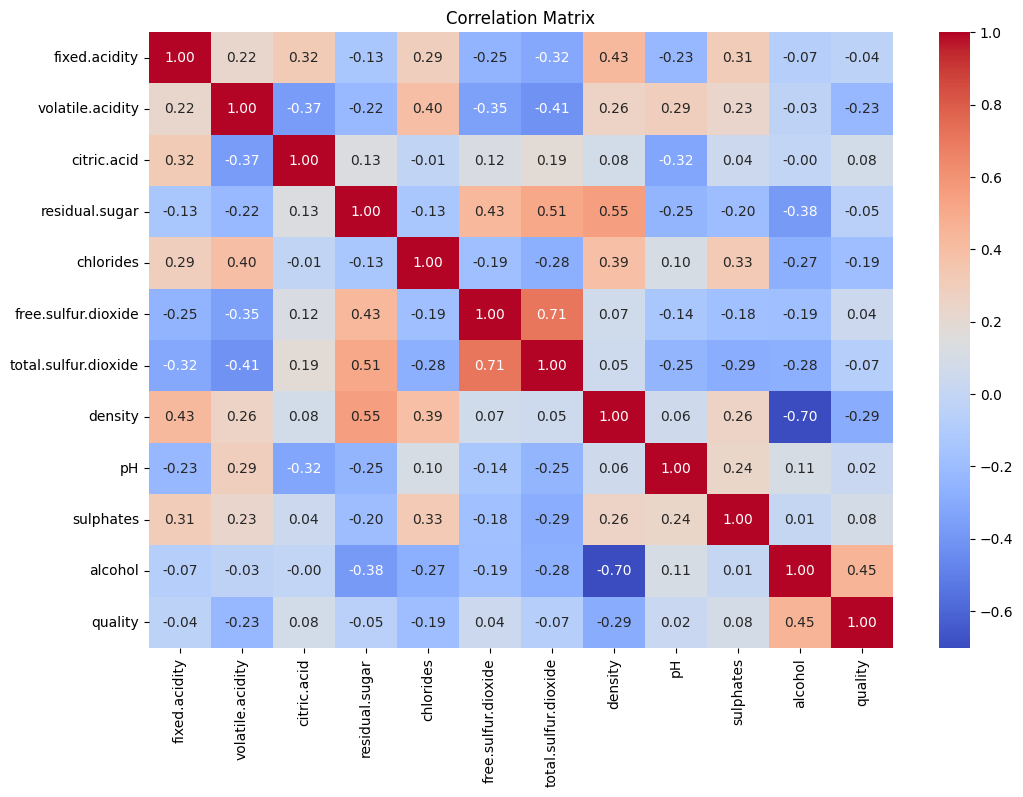

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Now let's split the data.

In [ ]:
from sklearn.model_selection import train_test_split

X = train_data.drop('quality', axis=1)
y = train_data['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (3800, 11)
X_val shape: (950, 11)
y_train shape: (3800,)
y_val shape: (950,)


Now, let's apply a method. I am going to try first random forest.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.27016336842105265
R-squared: 0.6433759448643841


The mean squared error and r-squared aren't the best, so let's fine tune the model by adding max_depth as 30, n_estimators as 150, and min_samples_split as 10. Referenced by: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error: 0.2695679532163742
R-squared: 0.6441619114668249


The edits with fine tuning the max_depth at 30 has improved, but not the best. The mean squared error is lower than the basic mean squared error and the r-squared is slightly higher than before. Let's try one more fine tuning before we compare to another method such as neural networks to see if we have better results for the training dataset and then we will apply to test_blinded.csv

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 0.2681610442105263
R-squared: 0.6460190751445087


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [20, 10, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)

#initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

#perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

#use the best model for prediction
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_val)

#evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 250}
Mean Squared Error: 0.26815408262070367
R-squared: 0.6460282646597537


Now, let's load up the test_blind.csv and apply what we did above

In [ ]:
test_data = pd.read_csv('test_blinded.csv')

In [ ]:
print(test_data.describe)

<bound method NDFrame.describe of         ID  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0        1            7.4              0.70         0.00             1.9   
1        2            7.8              0.88         0.00             2.6   
2        3           11.2              0.28         0.56             1.9   
3        4            7.4              0.70         0.00             1.9   
4        5            7.3              0.65         0.00             1.2   
...    ...            ...               ...          ...             ...   
3104  3105            5.7              0.21         0.32             0.9   
3105  3106            6.2              0.21         0.29             1.6   
3106  3107            6.6              0.32         0.36             8.0   
3107  3108            6.5              0.24         0.19             1.2   
3108  3109            5.5              0.29         0.30             1.1   

      chlorides  free.sulfur.dioxide  total.sulfur.di

In [ ]:
X_test = test_data.drop('ID', axis=1)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

#add the predictions to the test dataset
test_data['Quality'] = y_pred

#save the predictions to a new CSV file
test_data.to_csv('test_predictions_grid_search.csv', index=False)


In [ ]:
import pandas as pd

#load the predictions file
predictions_file = 'test_predictions_grid_search.csv'
predictions_data = pd.read_csv(predictions_file)

#display the quality results
print(predictions_data['Quality'])



0       5.136000
1       4.932000
2       5.688000
3       5.136000
4       4.788000
          ...   
3104    5.860000
3105    6.327897
3106    5.648000
3107    5.460000
3108    6.584000
Name: Quality, Length: 3109, dtype: float64


Before we move on to the test_blind.csv, let's apply this to possibly removing variables from the dataset that have a high correlation (in this case correlation, will be above 0.705)

In [ ]:
#store the names of the dropped variables
dropped_vars = []

#calculate the correlation matrix
corr_matrix = train_data.corr()

high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.705:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

#drop one of the highly correlated variables
if len(high_corr_vars) > 0:
    print("Dropping variables with high correlation:", high_corr_vars)
    dropped_vars.extend(high_corr_vars)
    train_data.drop(columns=high_corr_vars, inplace=True)
    #update X_train and X_val if needed

#re-split the data if any columns were dropped
X = train_data.drop('quality', axis=1)
y = train_data['quality']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dropped_vars_df = pd.DataFrame(columns=dropped_vars)
train_data = pd.concat([train_data, dropped_vars_df], axis=1)